**Artificial Neural Network**


**AIM:**
Before we dive in let me give a brief of what we are upto. We have a dataset which based on certain paramaters classifies a voice based on gender. How do humans do it?
> Sound waves travel into the ear canal until they reach the eardrum. The eardrum passes the vibrations through the middle ear bones or ossicles into the inner ear. The inner ear is shaped like a snail and is also called the cochlea. Inside the cochlea, there are thousands of tiny hair cells. Hair cells change the vibrations into electrical signals that are sent to the brain through the hearing nerve. The brain tells you that you are hearing a sound and what that sound is.
> 

What happens in the brain is neurons perform certain operations to classify the sound, this is exactly what we will be trying to simulate. We will try to mimmic the functioning (on a much*1000 smaller scale) just to get the basic idea.


**Step 1**

Import the basic libraries 
matplotlib :: To plot graphs
    numpy  :: To perform operations and manipulate arrays
    pandas :: To read and manage the data from the file

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Step 2**

We need to separate the dependent and independent variables. Here the first 20 set columns consists of the features and the last coloumn is the dependent variable, which takes to string values i.e Male and Female

In [17]:
dataset=pd.read_csv("../input/voice.csv")
X=dataset.iloc[:,0:20] #iloce is index location. Choosing all the rows and the first 20 columns
y=dataset.iloc[:,-1].values #this is a numpyy array. 
"""-1 means the last column, -2 means 2nd to last, so on. This produces a string for male or female.
Next step is to convert those strings into something the algorithm can work with"""
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [18]:
print(dataset.iloc[:,-1])
print(dataset.iloc[:,-1].nunique())

0         male
1         male
2         male
3         male
4         male
5         male
6         male
7         male
8         male
9         male
10        male
11        male
12        male
13        male
14        male
15        male
16        male
17        male
18        male
19        male
20        male
21        male
22        male
23        male
24        male
25        male
26        male
27        male
28        male
29        male
         ...  
3138    female
3139    female
3140    female
3141    female
3142    female
3143    female
3144    female
3145    female
3146    female
3147    female
3148    female
3149    female
3150    female
3151    female
3152    female
3153    female
3154    female
3155    female
3156    female
3157    female
3158    female
3159    female
3160    female
3161    female
3162    female
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object
2


**Step 3**

Now since we have the feature set and the set of dependent variables, We observe that the 'y' has strings and in maths we need values so what we will do is encode Male=1 and Female=0, (p.s I have nothing to do with assignments ;-) ). So we will use the LabelEncoder class and let it do its job.

In [19]:
from sklearn.preprocessing import LabelEncoder #Takes y outputs (labels) and converts them to 0s and 1s
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y) #Gets the strings from the last column, male=1 and female=0
print(y)

[1 1 1 ..., 0 0 0]


**Step 4**

Now if we observe the values in various columns we see that there is a problem either the values are extremely close to zero or the all the coloumn are of not the same scale. Why is there a need to Scale stuff might be the question, Well the answer is there is a lot of times where we will need to calculate slopes assume in the denominator two point are really close to zero, subtracting will lead it much more closer to zero and the slope assumes an amazingly huge value, so to prevent this kind of headache we generally use scaling in Neural Networks.

In [20]:
from sklearn.preprocessing import StandardScaler 
"""One column with very large values, versus another with small values. The computer tends to weigh
the former column greater due to higher values, which may not necessarily be the case.
Therefore we standardized all the columns within the same scale. In order to do thiswe assume that
we have a normal distribution --> subtracts the mean from each resulting value then
divides them by the standard deviation"""
X_sc = StandardScaler() #this is apart of sklearn
X = X_sc.fit_transform(X) #different from abouve. SC is applied to the first 20 columns

**Step 5**

Divide the data into training set and test set, One set to train the neural Network and the other set to test the neural network.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Step 6**

Now starts the actual game of building the neural network for this we first import the required libraries.

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History #Storing accuracy and loss information from each epoch
from keras.utils import plot_model
from keras.optimizers import SGD #Stochastic Gradient Descend. Review. 
"""This adds a bit of noise/randomness. It allows the algorithm to move in the direction that
minimizes gradient of cost function (finding the global minimum)."""


'This adds a bit of noise/randomness. It allows the algorithm to move in the direction that\nminimizes gradient of cost function (finding the global minimum).'

Before we get into the code let us try to understand the neural network structure we are aiming to build. What is the first thing we need to do if we want to understand or break down any sound? Simple we need to hear the sound in the coumputing terms we need to have an input. Here in the data set there are 20 paramaters which can also be called features and these are fed to the nodes on a one-to-one basis that is one node recieves one input.  We will call this the first layer and this is waht this piece of code does.
> **classifier.add(Dense(output_dim=11,init='uniform',activation='relu',input_dim=20))**

next we pass this sound to the processing unit the brain where we have a lot of itermediate processing neurons before we actually get the output. In this case we will add just 2 intermediate stages of processing neurons with 11 nodes in each layer.
> 

> **classifier.add(Dense(output_dim=11,init='uniform',activation='relu'))**


> **classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))**

Now we need to get the output and one node will do the job

> **classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))**

If you are wondering what is relu and sigmoid well these are the functions which are used to calculate the weights/loss etc. Do considering checking out what they stand for.

In the end we feed out data to the neural Network and wait for the magic to happen.

In [23]:
classifier=Sequential()
history = History() #we are making an instance of the class History that was imported from keras.callbacks
"""History itself is not a variable. This is immaterial with respect to the algorithm, 
but when we create an instance, we materialize it and this is the only time this exists. This is like 
pitching the idea of History to the computer, versus creating a prototype for the computer to work with"""
#number of input variables =20
#first layer 
#input_dim is only for the first layer
classifier.add(Dense(output_dim=11,init='uniform',activation='relu',input_dim=20)) 
#we choose output_dim via empirical data. We make sure the choice of dimensions does not give way to overfitting.
"""'uniform' is used to initialize the values of the prescribed weights and keep them consistent 
throughout one feedfoward process."""
#first Hidden layer
classifier.add(Dense(output_dim=11,init='uniform',activation='relu'))
#Second Hidden
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
#output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid')) #
"""Sigmoid brings any number between 0 and 1,and is used in the last layer because probability is
'read' between 0 and 1"""
#Running the artificial neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
"""Adam optimizer reduces the step size in order to mitigate possibility of overstepping the minimum.
Similar to SGD but doesn't have randomness."""
#fitting
classifier.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1,callbacks=[history],shuffle=2) 
#validation within the training set. So 80% of the original dataset is training, then 10% of training is not for validation
"""callbacks are functions used to monitor the way learning is done (whether it is improving or not
e.g. model checkpoint. It saves the model at each epoch) History stores accuracy, validation loss, etc.
Early stopping stops the model from being trained to much with poor parameters that may cause 
overfitting. It will check to see the model's error or accuracy and stop if it performs 
unsatisfactorily"""


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=11, kernel_initializer="uniform")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Train on 2280 samples, validate on 254 samples
Epoch 1/10
2280/2280 [==============================] - 1s 238us/step - loss: 0.6898 - acc: 0.6741 - val_loss: 0.6755 - val_acc: 0.8740
Epoch 2/10
2280/2280 [==============================] - 0s 59us/step - loss: 0.5693 - acc: 0.8921 - val_loss: 0.4050 - val_acc: 0.8740
Epoch 3/10
2280/2280 [==============================] - 0s 66us/step - loss: 0.3033 - acc: 0.9026 - val_loss: 0.2441 - val_acc: 0.8898
Epoch 4/10
2280/2280 [==============================] - 0s 62us/step - loss: 0.1782 - acc: 0.9434 - val_loss: 0.1633 - val_acc: 0.9409
Epoch 5/10
2280/2280 [==============================] - 0s 57us/step - loss: 0.1258 - acc: 0.9645 - val_loss: 0.1421 - val_acc: 0.9488
Epoch 6/10
2280/2280 [==============================] - 0s 61us/step - loss: 0.0997 - acc: 0.9711 - val_loss: 0.1075 - val_acc: 0.9685
Epoch 7/10
2280/2280 [==============================] - 0s 64us/step - loss: 0.0874 - acc: 0.9746 - val_loss: 0.1176 - val_acc: 0.9685
Epoch 8

"callbacks are functions used to monitor the way learning is done (whether it is improving or not\ne.g. model checkpoint. It saves the model at each epoch) History stores accuracy, validation loss, etc.\nEarly stopping stops the model from being trained to much with poor parameters that may cause \noverfitting. It will check to see the model's error or accuracy and stop if it performs \nunsatisfactorily"

**Final Step **

It is always important to see, what actually is happening and how the model is learning. So with every epoch there is some learning which happens. The model is capable of calculating the loss it is facing from the actual result and then correspondingly adjusts its weight in 

In [24]:
import sklearn.metrics as metrics 
#Now we will be predicting for test dataset and plotting loss/accuracy
"""Using a package/library to evaluate the delta between true vs predicted labels (y output) to 
find the error of the algorithm"""
y_pred=classifier.predict(X_test) #Review
y_pred = np.round(y_pred) #Integers

In [25]:
y_pred #so it rounds  +- 0.5

array([[ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
      

In [26]:
history.history
#This contains the information of acc/loss & val_acc/val_loss.

{'acc': [0.6741228070175439,
  0.89210526315789473,
  0.90263157894736845,
  0.94342105263157894,
  0.96447368421052626,
  0.97105263157894739,
  0.97456140350877196,
  0.97499999999999998,
  0.97675438596491226,
  0.97763157894736841],
 'loss': [0.68983609634533261,
  0.56929762572572939,
  0.30334923016397575,
  0.17823804330668952,
  0.12578488687674205,
  0.09966191440297846,
  0.087431750747195461,
  0.081360622495412829,
  0.079810901639754309,
  0.076478691444846619],
 'val_acc': [0.87401574568485652,
  0.87401574568485652,
  0.88976377718091948,
  0.94094488188976377,
  0.94881889763779526,
  0.96850393700787396,
  0.96850393700787396,
  0.96850393700787396,
  0.96456692913385822,
  0.95669291338582674],
 'val_loss': [0.67550400626940987,
  0.40497859655402779,
  0.24405149599229256,
  0.16331534433787262,
  0.14209527407926836,
  0.10753968286174019,
  0.11757966613499668,
  0.10907178807739668,
  0.1110618155097633,
  0.12912553477680355]}

Accuracy we are able to achieve with our ANN is 97.6340694006 %


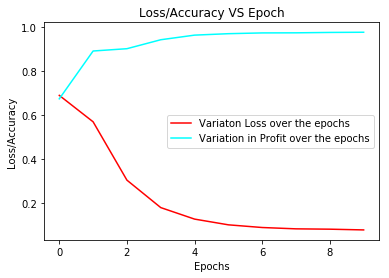

In [27]:
print('Accuracy we are able to achieve with our ANN is',metrics.accuracy_score(y_pred,y_test)*100,'%')

plt.plot(history.history['loss'], color = 'red',label='Variaton Loss over the epochs',)
"""'history' is the space or variable used to store values. It is defined as an 
instance of callbacks"""
#history is an instance of the history class
plt.plot(history.history['acc'],color='cyan',label='Variation in Profit over the epochs')

plt.xlabel('Epochs')
plt.title('Loss/Accuracy VS Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='best')
plt.show()

If we observe the graph, Over a period of time it clear that the loss is gradually hitting zero and the Accuracy is increasing at a considerable rate.